Fuente: https://www.kaggle.com/rafaelgreca/wnba-games-box-score-since-1997

### Librerías utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# import matplotlib.dates as mdates
# from matplotlib.dates import DateFormatter

### Lectura de los CSV y creación de los DataFrames

In [2]:
df1 = pd.read_csv('1997-2000_officialBoxScore.csv', index_col='gmDate', parse_dates=True)
df2 = pd.read_csv('2001-2010_officialBoxScore.csv', index_col='gmDate', parse_dates=True)
df3 = pd.read_csv('2011-2020_officialBoxScore.csv', index_col='gmDate', parse_dates=True)

### Filtrado por columnas de interés y tratamiento de los datos

In [3]:
all_seasons = pd.concat([df1, df2, df3])
all_seasons = all_seasons[['season', 'seasonType','teamAbbr', 'teamPTS', 'teamFG%', 'teamTS%', 'teamEFG%', 'teamPace', 'teamOrtg', 'team3PA', 'team3P%', 'teamFTA', 'teamFT%']]
all_reg_seasons = all_seasons.loc[all_seasons['seasonType'] == "Regular"]
mean_by_year = all_reg_seasons.groupby('season').mean()
mean_by_year

,teamPTS,teamFG%,teamTS%,teamEFG%,teamPace,teamOrtg,team3PA,team3P%,teamFTA,teamFT%
season,,,,,,,,,,
1997,67.142857,0.412500,0.523036,0.445536,71.679643,112.416518,12.000000,0.340089,19.294643,0.712589
1998,68.853333,0.421067,0.531067,0.453000,72.509800,114.255333,11.953333,0.331533,19.660000,0.716200
1999,67.322917,0.414167,0.530625,0.450937,70.904792,114.016979,13.708333,0.319271,18.979167,0.735677
2000,67.207031,0.428984,0.544141,0.466172,68.810273,116.666797,12.566406,0.334609,18.070312,0.733086
2001,64.269531,0.411133,0.523047,0.447773,68.755039,111.653359,12.808594,0.328281,16.816406,0.742383
2002,66.144531,0.420352,0.537305,0.458437,68.935898,115.092734,12.773438,0.339688,17.796875,0.748047
2003,66.008403,0.413950,0.525294,0.451765,70.698487,112.196303,13.575630,0.326555,17.214286,0.733403
2004,65.461538,0.416425,0.528959,0.453077,69.362172,113.062805,12.276018,0.346787,17.407240,0.739276
2005,65.429864,0.420000,0.532217,0.453122,68.896063,114.067919,11.719457,0.317330,17.954751,0.743620


In [4]:
for col in mean_by_year.columns:
    mean_by_year[col + " mean"] = mean_by_year[col].mean()

mean_by_year

,teamPTS,teamFG%,teamTS%,teamEFG%,teamPace,teamOrtg,team3PA,team3P%,teamFTA,teamFT%,teamPTS mean,teamFG% mean,teamTS% mean,teamEFG% mean,teamPace mean,teamOrtg mean,team3PA mean,team3P% mean,teamFTA mean,teamFT% mean
season,,,,,,,,,,,,,,,,,,,,
1997,67.142857,0.412500,0.523036,0.445536,71.679643,112.416518,12.000000,0.340089,19.294643,0.712589,73.056055,0.424571,0.541605,0.465185,80.699989,109.663263,15.300479,0.336065,18.417387,0.762269
1998,68.853333,0.421067,0.531067,0.453000,72.509800,114.255333,11.953333,0.331533,19.660000,0.716200,73.056055,0.424571,0.541605,0.465185,80.699989,109.663263,15.300479,0.336065,18.417387,0.762269
1999,67.322917,0.414167,0.530625,0.450937,70.904792,114.016979,13.708333,0.319271,18.979167,0.735677,73.056055,0.424571,0.541605,0.465185,80.699989,109.663263,15.300479,0.336065,18.417387,0.762269
2000,67.207031,0.428984,0.544141,0.466172,68.810273,116.666797,12.566406,0.334609,18.070312,0.733086,73.056055,0.424571,0.541605,0.465185,80.699989,109.663263,15.300479,0.336065,18.417387,0.762269
2001,64.269531,0.411133,0.523047,0.447773,68.755039,111.653359,12.808594,0.328281,16.816406,0.742383,73.056055,0.424571,0.541605,0.465185,80.699989,109.663263,15.300479,0.336065,18.417387,0.762269
2002,66.144531,0.420352,0.537305,0.458437,68.935898,115.092734,12.773438,0.339688,17.796875,0.748047,73.056055,0.424571,0.541605,0.465185,80.699989,109.663263,15.300479,0.336065,18.417387,0.762269
2003,66.008403,0.413950,0.525294,0.451765,70.698487,112.196303,13.575630,0.326555,17.214286,0.733403,73.056055,0.424571,0.541605,0.465185,80.699989,109.663263,15.300479,0.336065,18.417387,0.762269
2004,65.461538,0.416425,0.528959,0.453077,69.362172,113.062805,12.276018,0.346787,17.407240,0.739276,73.056055,0.424571,0.541605,0.465185,80.699989,109.663263,15.300479,0.336065,18.417387,0.762269
2005,65.429864,0.420000,0.532217,0.453122,68.896063,114.067919,11.719457,0.317330,17.954751,0.743620,73.056055,0.424571,0.541605,0.465185,80.699989,109.663263,15.300479,0.336065,18.417387,0.762269


### Visualizaciones

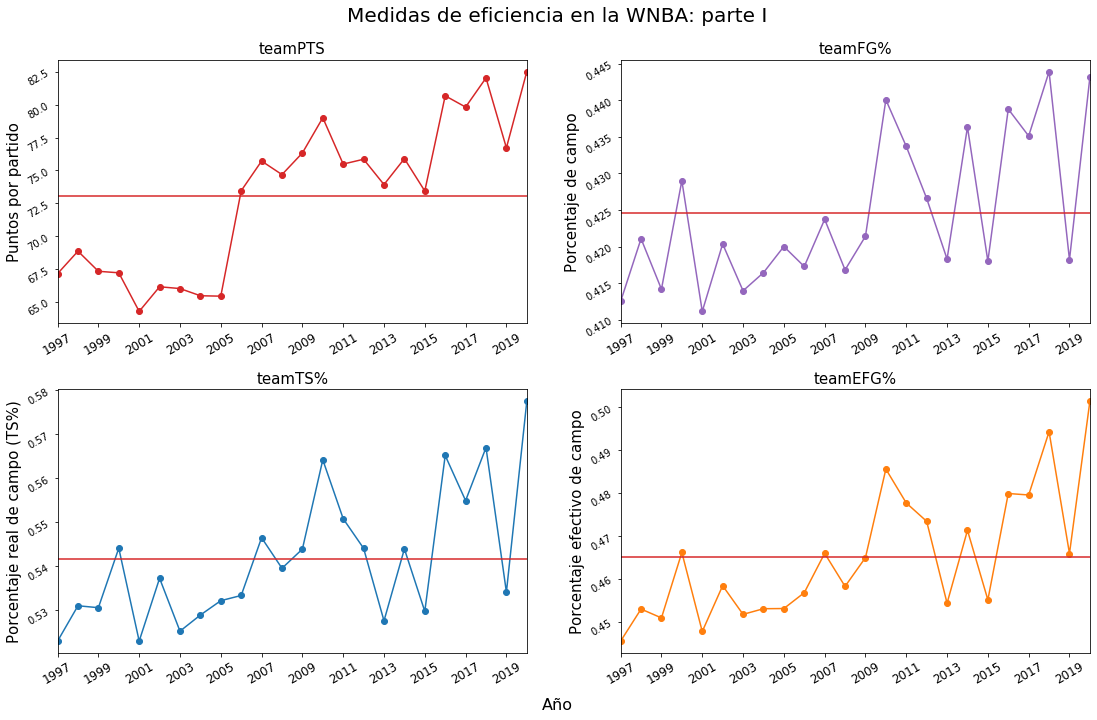

In [7]:
ticks = np.linspace(1997, 2019, num=12, dtype=int)

# Gráfico 1
fig, ax = plt.subplots(2, 2, sharey=False)
data_line1 = ax[0, 0].plot(mean_by_year.index, mean_by_year['teamPTS'], 'tab:red', marker='o')
mean_line1 = ax[0, 0].plot(mean_by_year.index, mean_by_year['teamPTS mean'], 'tab:red')
ax[0, 0].tick_params(labelrotation=30)
ax[0, 0].set_xlim(mean_by_year.index[0], mean_by_year.index[-1])
ax[0, 0].set_title('teamPTS', size=15)
ax[0, 0].set_xticks(ticks) 
ax[0, 0].set_xticklabels(ticks, fontsize=12)
ax[0, 0].set_ylabel("Puntos por partido", fontsize=15)

# Gráfico 2
data_line2 = ax[0, 1].plot(mean_by_year.index, mean_by_year['teamFG%'], 'tab:purple', marker='o')
mean_line2 = ax[0, 1].plot(mean_by_year.index, mean_by_year['teamFG% mean'], 'tab:red')
ax[0, 1].tick_params(labelrotation=30)
ax[0, 1].set_xlim(mean_by_year.index[0], mean_by_year.index[-1])
ax[0, 1].set_title('teamFG%', size=15)
ax[0, 1].set_xticks(ticks) 
ax[0, 1].set_xticklabels(ticks, fontsize=12)
ax[0, 1].set_ylabel("Porcentaje de campo", fontsize=15)

# Gráfico 3
data_line3 = ax[1, 0].plot(mean_by_year.index, mean_by_year['teamTS%'], 'tab:blue', marker='o')
mean_line3 = ax[1, 0].plot(mean_by_year.index, mean_by_year['teamTS% mean'], 'tab:red')
ax[1, 0].tick_params(labelrotation=30)
ax[1, 0].set_xlim(mean_by_year.index[0], mean_by_year.index[-1])
ax[1, 0].set_title('teamTS%', size=15)
ax[1, 0].set_xticks(ticks) 
ax[1, 0].set_xticklabels(ticks, fontsize=12)
ax[1, 0].set_ylabel("Porcentaje real de campo (TS%)", fontsize=15)

# Gráfico 4
data_line4 = ax[1, 1].plot(mean_by_year.index, mean_by_year['teamEFG%'], 'tab:orange', marker='o')
mean_line4 = ax[1, 1].plot(mean_by_year.index, mean_by_year['teamEFG% mean'], 'tab:red')
ax[1, 1].tick_params(labelrotation=30)
ax[1, 1].set_xlim(mean_by_year.index[0], mean_by_year.index[-1])
ax[1, 1].set_title('teamEFG%', size=15)
ax[1, 1].set_xticks(ticks) 
ax[1, 1].set_xticklabels(ticks, fontsize=12)
ax[1, 1].set_ylabel("Porcentaje efectivo de campo", fontsize=15)

fig.suptitle('Medidas de eficiencia en la WNBA: parte I', size=20)
fig.subplots_adjust(top=0.91)
fig.text(0.5, 0.05, 'Año', ha='center', size=16)

fig.set_size_inches(18.5, 10.5)
plt.subplots_adjust(hspace=0.25)

plt.savefig('WNBA_offense_I.png')

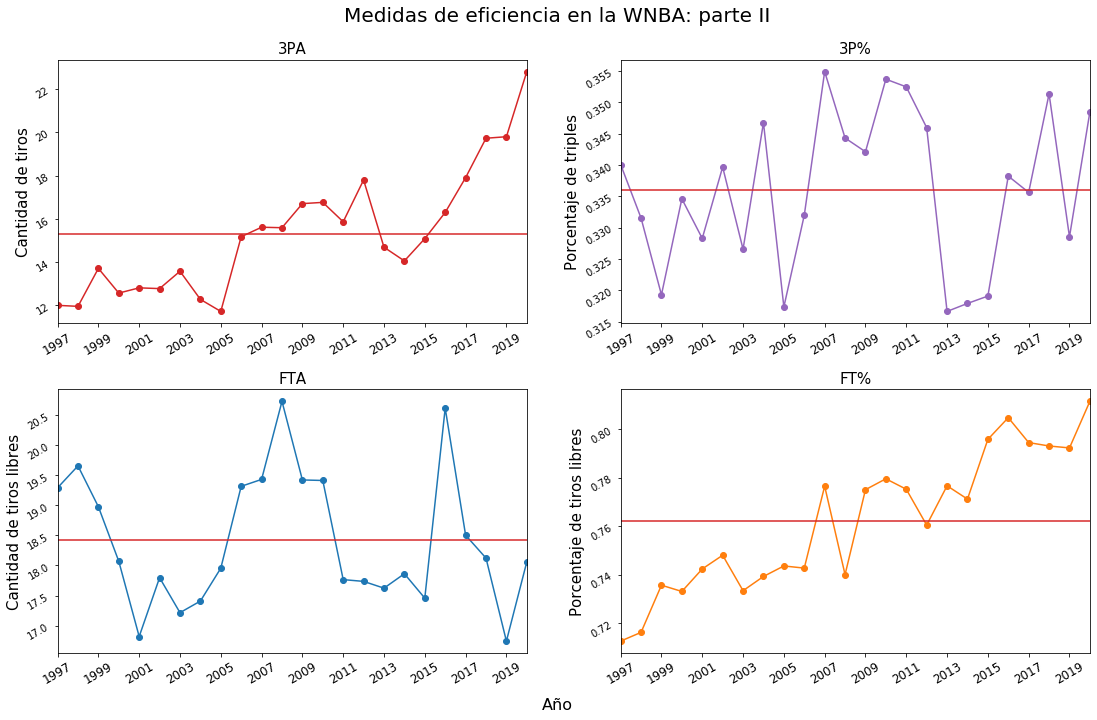

In [6]:
ticks = np.linspace(1997, 2019, num=12, dtype=int)

fig, ax = plt.subplots(2, 2, sharey=False) #gridspec_kw={'width_ratios': [2, 2]})
data_line1 = ax[0, 0].plot(mean_by_year.index, mean_by_year['team3PA'], 'tab:red', marker='o')
mean_line1 = ax[0, 0].plot(mean_by_year.index, mean_by_year['team3PA mean'], 'tab:red')
ax[0, 0].tick_params(labelrotation=30)
ax[0, 0].set_xlim(mean_by_year.index[0], mean_by_year.index[-1])
ax[0, 0].set_title('3PA', size=15)
ax[0, 0].set_xticks(ticks) 
ax[0, 0].set_xticklabels(ticks, fontsize=12)
ax[0, 0].set_ylabel("Cantidad de tiros", fontsize=15)

data_line2 = ax[0, 1].plot(mean_by_year.index, mean_by_year['team3P%'], 'tab:purple', marker='o')
mean_line2 = ax[0, 1].plot(mean_by_year.index, mean_by_year['team3P% mean'], 'tab:red')
ax[0, 1].tick_params(labelrotation=30)
ax[0, 1].set_xlim(mean_by_year.index[0], mean_by_year.index[-1])
ax[0, 1].set_title('3P%', size=15)
ax[0, 1].set_xticks(ticks) 
ax[0, 1].set_xticklabels(ticks, fontsize=12)
ax[0, 1].set_ylabel("Porcentaje de triples", fontsize=15)

data_line3 = ax[1, 0].plot(mean_by_year.index, mean_by_year['teamFTA'], 'tab:blue', marker='o')
mean_line3 = ax[1, 0].plot(mean_by_year.index, mean_by_year['teamFTA mean'], 'tab:red')
ax[1, 0].tick_params(labelrotation=30)
ax[1, 0].set_xlim(mean_by_year.index[0], mean_by_year.index[-1])
ax[1, 0].set_title('FTA', size=15)
ax[1, 0].set_xticks(ticks) 
ax[1, 0].set_xticklabels(ticks, fontsize=12)
ax[1, 0].set_ylabel("Cantidad de tiros libres", fontsize=15)

data_line4 = ax[1, 1].plot(mean_by_year.index, mean_by_year['teamFT%'], 'tab:orange', marker='o')
mean_line4 = ax[1, 1].plot(mean_by_year.index, mean_by_year['teamFT% mean'], 'tab:red')
ax[1, 1].tick_params(labelrotation=30)
ax[1, 1].set_xlim(mean_by_year.index[0], mean_by_year.index[-1])
ax[1, 1].set_title('FT%', size=15)
ax[1, 1].set_xticks(ticks) 
ax[1, 1].set_xticklabels(ticks, fontsize=12)
ax[1, 1].set_ylabel("Porcentaje de tiros libres", fontsize=15)

fig.suptitle('Medidas de eficiencia en la WNBA: parte II', size=20)
fig.subplots_adjust(top=0.91)
fig.text(0.5, 0.05, 'Año', ha='center', size=16)

fig.set_size_inches(18.5, 10.5)
plt.subplots_adjust(hspace=0.25)